In [1]:
import numpy as np

## 1 Preparation

### What is the purpose of an activation function in NN in general

First, let's quickly recap: Neural Networks are networks of neurons. Each neuron receives potentials from other neurons (or other sources, e.g. photoreceptors), which influence its own potential. This potential needs to reach a certain *threshold* to "fire" again, i.e. to send the signal forward. In general, the task of the *threshold* is to differentiate between *noise* and important *stimulus*.  
Conceptually, a neuron in an ANN serves the same purpose: *Sum up incoming information, decide whether the input is noise or stimulus and decide to fire*. This is all encompassed by the activation function. 

### What's the advantage of e.g. sigmoid over the step function (threshold function)

Step function: $$\sigma(x) := y = \begin{cases} 1\text{ for }x\geq 0 \\ 0 \text{ for } x < 0 \end{cases}$$  
(see sigmoid below)  
In a nut shell, while the step function is biologically motivated and simple to implement, the big disadvantage is that it's derivative is 0 everywhere. Since we need a derivative for our gradient descent approach to optimization, we should choose an activtion function that's derivative contains valuable information: A very popular alternative is the sigmoid function. Another advantage is that the sigmoid function also adheres to the *Universal Approximation Theorem*, which in summary just states that an MLP with one hidden layer can approximate any (real) function given enough neurons in this hidden layer. Neat. 

### What does sigmoid look like (the formula as well as the graph)?

Sigmoid: $$\sigma(x) = \frac{1}{1+e^{-x}}$$  
For Sigmoid-prime (derivative), see below. 
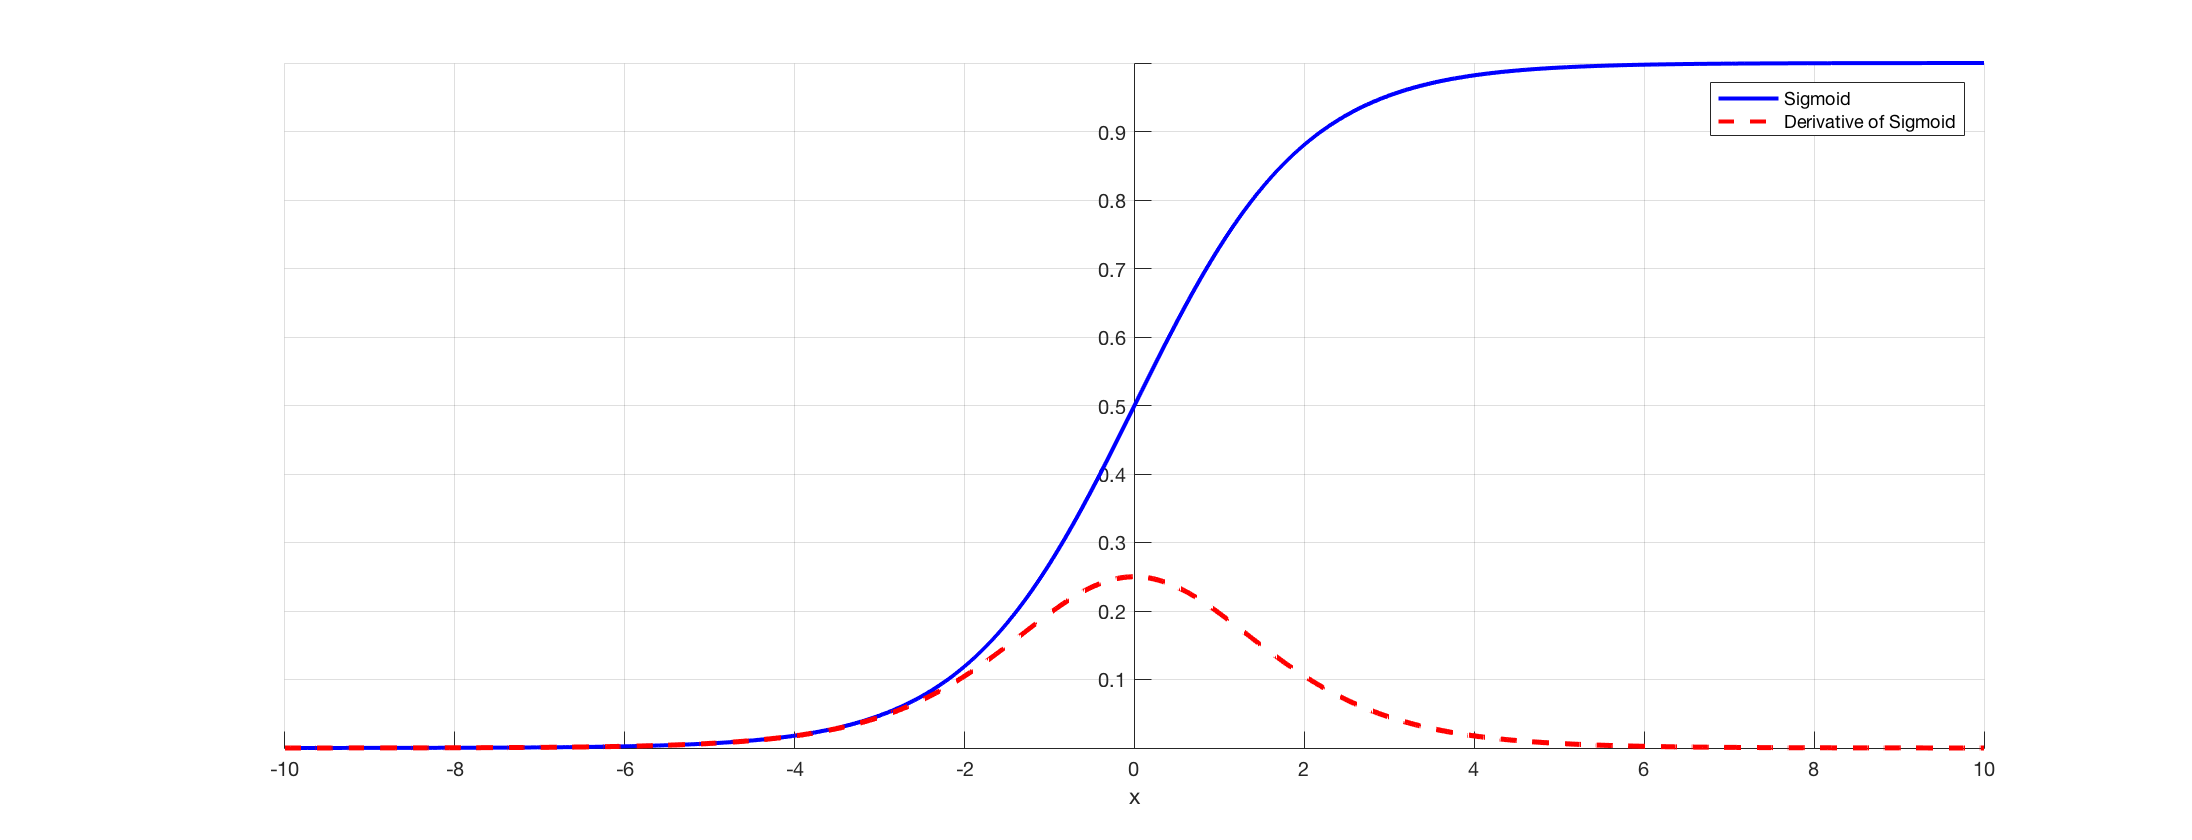

### What is the derivative of sigmoid 

$$\frac{d}{dx} \sigma=\sigma'(x) = \sigma(x)(1-\sigma(x))$$

In [2]:
# Super simple sigmoid, no error handling, using the already importet numpy exponent 
# function instead of loading the extra python math module. 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [3]:
# Simply using the above definition of sigmoidprime and our priorly defined sigmoid function.
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

## 2 Data set

In [4]:
data = np.array([[0,0],[0,1],[1,0],[1,1]]) # permutate all posibilities
# Correct labels for all 5 logic tasks 
lab_and = np.array([0,0,0,1])
lab_or = np.array([0,1,1,1])
lab_notand = np.array([1,1,1,0])
lab_notor = np.array([1,0,0,0])
lab_xor = np.array([0,1,1,0])

## 3 Perceptron 

In [152]:
# Perceptron from flipped classroom
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 0.01.
        self.alpha = 0.01
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        weighted_sum =  self.weights @ input + self.bias 
        # An alternative would be:
        # weighted_sum =  np.dot(input, self.weights) + self.bias

        # 2. Return a 1 or a 0, depending on whether the perceptron surpassed the threshold. 
        # You can use 'int(...)' to make an integer out of a boolean.
        return sigmoid(sum(weighted_sum)) if not isinstance(weighted_sum,float) else sigmoid(weighted_sum)
        
    def update(self, delta):
        self.gradient = delta * self.input_units
        self.weigths = self.weights - self.alpha *self.gradient
    

## 5 Multi-Layer-Perceptron

In [181]:
class MLP():
    def __init__(self, nPerc, nInputs):
        self.hidden = np.array([Perceptron(nInputs) for i in range(nPerc)])
        self.outputPerc = Perceptron(nPerc)
    
    def forward_step(self):
        for sample in data:
            self.hiddenLayerOutput = [perc.forward_step(sample) for perc in self.hidden]
        self.output = self.outputPerc.forward_step(self.hiddenLayerOutput)
        
    def backprop_step(self, labels):
      
        errorOutput = -(self.output-labels)*sigmoidprime(sum(self.hiddenLayerOutput))
        for perc in self.hidden:
            
            
        print([errorOutput*perc.weights for perc in  self.hidden])
        [perc.update(sum(errorOutput*perc.weights*sigmoidprime(sum(labels)) )) for perc in self.hidden]
        

In [182]:

def train(nPerc,inputs_units,epochs, labels):
    mlp = MLP(nPerc,inputs_units)
    loss = []
    for i in range(0,epochs):
        mlp.forward_step()
        loss.append((i,(mlp.output-labels)**2))
        mlp.backprop_step(labels)
    return mlp, loss

train(4,2,1000,lab_and)

    

[-0.04189365 -0.04189365 -0.04189365  0.03031767]
-0.04189365201160704
-1.7314385176584222


-0.04189365201160704
0.08765156177836467


-0.04189365201160704
0.5559127667853578


-0.04189365201160704
0.6939578550799238


-0.04189365201160704
0.16705770311951268


-0.04189365201160704
1.175942075053289


-0.04189365201160704
1.4041736152304285


-0.04189365201160704
0.805005548718747




ValueError: operands could not be broadcast together with shapes (4,) (2,) 